In [1]:
import acquire, prepare, wrangle_zillow

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Bringing in the zillow dataframe

In [2]:
df = acquire.zillow_datac()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77414 non-null  int64  
 1   parcelid                      77414 non-null  int64  
 2   airconditioningtypeid         21395 non-null  float64
 3   architecturalstyletypeid      151 non-null    float64
 4   basementsqft                  44 non-null     float64
 5   bathroomcnt                   77414 non-null  float64
 6   bedroomcnt                    77414 non-null  float64
 7   buildingclasstypeid           381 non-null    float64
 8   buildingqualitytypeid         50182 non-null  float64
 9   calculatedbathnbr             74202 non-null  float64
 10  decktypeid                    510 non-null    float64
 11  finishedfloor1squarefeet      5953 non-null   float64
 12  calculatedfinishedsquarefeet  76306 non-null  float64
 13  f

- Dropping columns that seem to be repeats and/or no bueno

In [3]:
df = df.drop(columns=['id','parcelid','architecturalstyletypeid','buildingclasstypeid','buildingqualitytypeid',
            'decktypeid','finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet50',
            'finishedsquarefeet6','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7',
            'threequarterbathnbr','yardbuildingsqft17','yardbuildingsqft26','taxdelinquencyflag','taxdelinquencyyear',
            'censustractandblock'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airconditioningtypeid         21395 non-null  float64
 1   basementsqft                  44 non-null     float64
 2   bathroomcnt                   77414 non-null  float64
 3   bedroomcnt                    77414 non-null  float64
 4   calculatedbathnbr             74202 non-null  float64
 5   finishedfloor1squarefeet      5953 non-null   float64
 6   calculatedfinishedsquarefeet  76306 non-null  float64
 7   fips                          77414 non-null  float64
 8   fireplacecnt                  8394 non-null   float64
 9   fullbathcnt                   74202 non-null  float64
 10  garagecarcnt                  23253 non-null  float64
 11  garagetotalsqft               23253 non-null  float64
 12  latitude                      77414 non-null  float64
 13  l

,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,0.025595,2017-01-01
1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,0.055619,2017-01-01
2,NaN,NaN,0.0,0.0,NaN,NaN,73026.0,6037.0,NaN,NaN,...,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,0.005383,2017-01-01
3,NaN,NaN,0.0,0.0,NaN,NaN,5068.0,6037.0,NaN,NaN,...,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,-0.103410,2017-01-01
4,NaN,NaN,0.0,0.0,NaN,NaN,1776.0,6037.0,NaN,NaN,...,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,1.0,NaN,3.0,4.0,3.0,NaN,1921.0,6037.0,NaN,3.0,...,1990.0,NaN,NaN,129566.0,162019.0,2016.0,32453.0,2860.33,0.020615,2017-09-20
77410,1.0,NaN,3.0,4.0,3.0,NaN,1780.0,6037.0,NaN,3.0,...,1989.0,NaN,NaN,100744.0,125923.0,2016.0,25179.0,2394.26,0.013209,2017-09-21
77411,1.0,NaN,2.0,3.0,2.0,NaN,1549.0,6037.0,NaN,2.0,...,1990.0,NaN,NaN,149241.0,198988.0,2016.0,49747.0,3331.81,0.037129,2017-09-21
77412,1.0,NaN,3.0,3.0,3.0,NaN,1339.0,6037.0,NaN,3.0,...,1990.0,NaN,NaN,118900.0,148600.0,2016.0,29700.0,2510.53,0.007204,2017-09-25


In [4]:
df['fips'] = df['fips'].replace([6037,6059,6111],['la_county','orange_county','ventura_county'])

In [5]:
train, validate, test = wrangle_zillow.split_data(df)
train.info()
train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43351 entries, 12097 to 42699
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airconditioningtypeid         11854 non-null  float64
 1   basementsqft                  20 non-null     float64
 2   bathroomcnt                   43351 non-null  float64
 3   bedroomcnt                    43351 non-null  float64
 4   calculatedbathnbr             41500 non-null  float64
 5   finishedfloor1squarefeet      3351 non-null   float64
 6   calculatedfinishedsquarefeet  42711 non-null  float64
 7   fips                          43351 non-null  object 
 8   fireplacecnt                  4677 non-null   float64
 9   fullbathcnt                   41500 non-null  float64
 10  garagecarcnt                  13048 non-null  float64
 11  garagetotalsqft               13048 non-null  float64
 12  latitude                      43351 non-null  float64
 1

,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
12097,13.0,NaN,3.0,4.0,3.0,NaN,2410.0,orange_county,2.0,3.0,...,1979.0,2.0,NaN,185651.0,623204.0,2016.0,437553.0,6432.84,0.014903,2017-02-24
23100,NaN,NaN,3.0,3.0,3.0,NaN,1685.0,la_county,NaN,3.0,...,1995.0,NaN,NaN,186699.0,327175.0,2016.0,140476.0,4065.59,0.000981,2017-04-04
9346,NaN,NaN,2.0,3.0,2.0,NaN,1390.0,la_county,NaN,2.0,...,1955.0,NaN,NaN,56784.0,78419.0,2016.0,21635.0,1145.14,-0.065564,2017-02-13
34549,NaN,NaN,2.0,3.0,2.0,NaN,1483.0,la_county,NaN,2.0,...,1926.0,NaN,NaN,16594.0,53432.0,2016.0,36838.0,742.99,0.051982,2017-05-10
27477,NaN,NaN,3.0,4.0,3.0,NaN,3275.0,orange_county,NaN,3.0,...,1996.0,NaN,NaN,340015.0,409305.0,2016.0,69290.0,4431.74,0.073318,2017-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30664,NaN,NaN,2.0,3.0,2.0,1258.0,1258.0,ventura_county,1.0,2.0,...,1959.0,1.0,NaN,96000.0,416000.0,2016.0,320000.0,4920.82,0.007457,2017-04-28
17875,1.0,NaN,2.0,2.0,2.0,NaN,940.0,la_county,NaN,2.0,...,1987.0,NaN,NaN,144312.0,220812.0,2016.0,76500.0,3330.97,-0.079712,2017-03-17
73923,NaN,NaN,0.0,0.0,NaN,NaN,NaN,la_county,NaN,NaN,...,2008.0,NaN,NaN,42162.0,57755.0,2016.0,15593.0,821.60,0.031690,2017-09-06
31017,NaN,NaN,1.0,2.0,1.0,NaN,827.0,la_county,NaN,1.0,...,1954.0,NaN,NaN,79263.0,396334.0,2016.0,317071.0,4761.73,0.010067,2017-04-28


1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- What is the distribution of the log error among the counties?

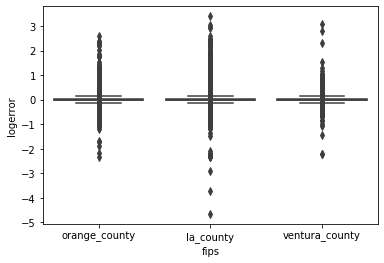

In [6]:
sns.boxplot(train.fips, train.logerror)

In [7]:
from scipy.stats import f_oneway

orange = train[train.fips == 'orange_county'].logerror
la = train[train.fips == 'la_county'].logerror
ventura = train[train.fips == 'ventura_county'].logerror

f, p = f_oneway(orange, la, ventura)
print(p)

0.21912513523898555


- What is the distribution of the variables?


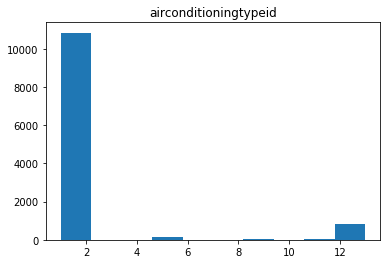

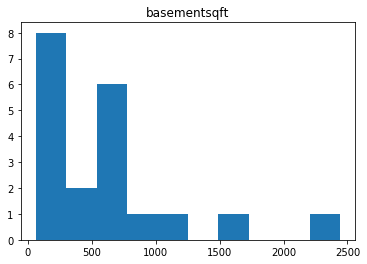

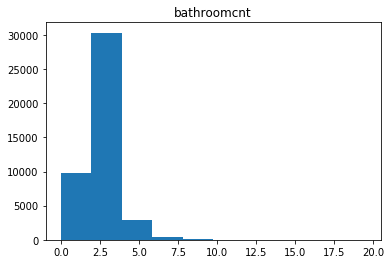

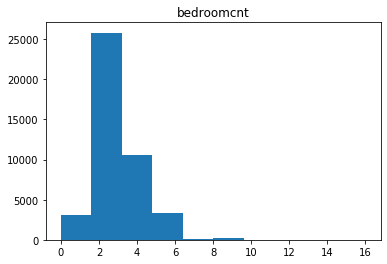

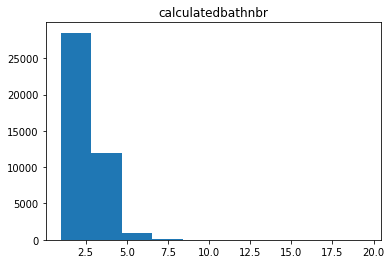

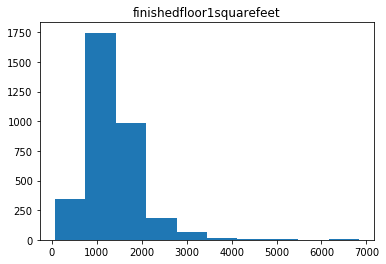

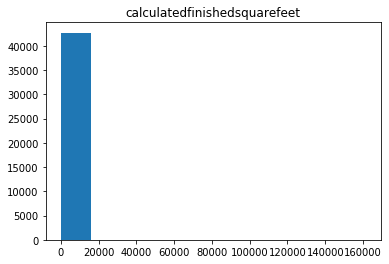

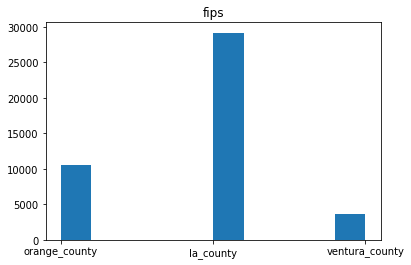

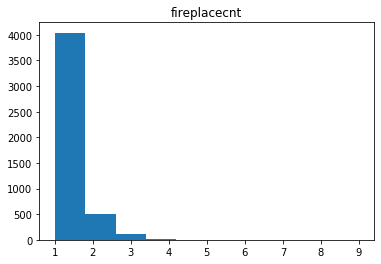

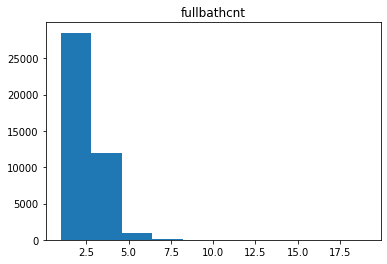

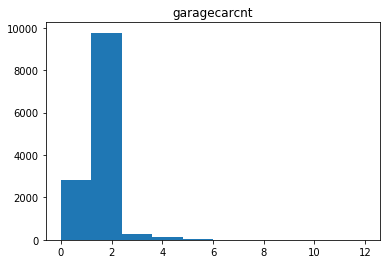

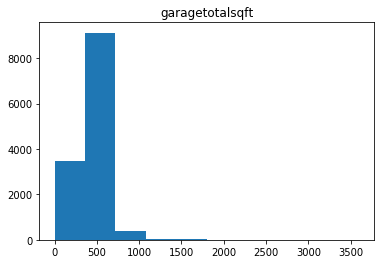

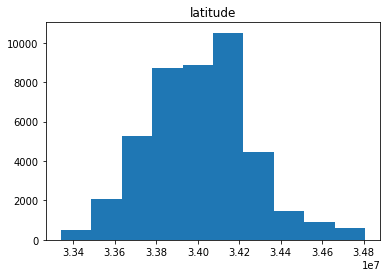

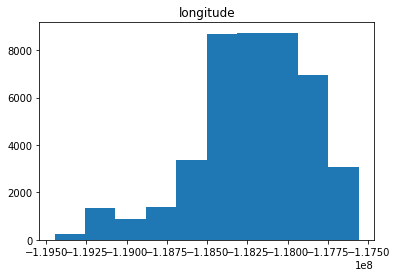

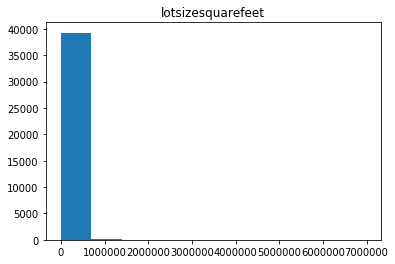

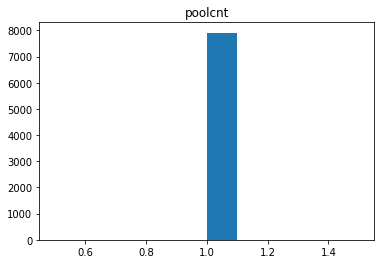

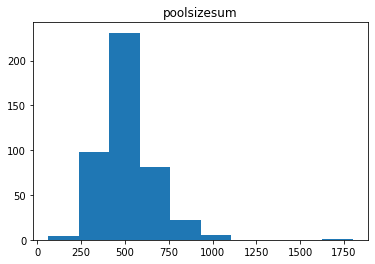

TypeError: None is not a string

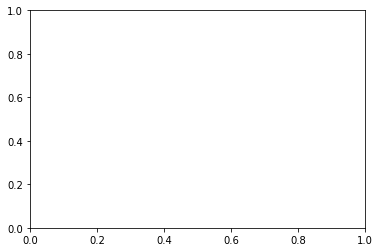

In [8]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

- Does logerror vary by sqft?

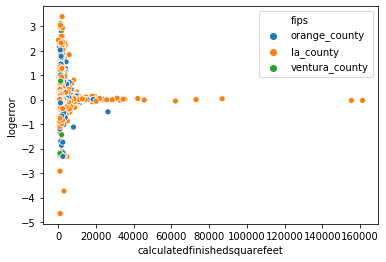

In [9]:
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='logerror', hue='fips')


KeyboardInterrupt: 

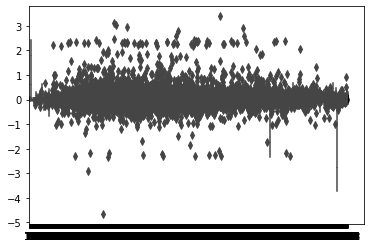

In [10]:
sns.boxplot(train.calculatedfinishedsquarefeet, train.logerror)

In [ ]:
stats.levene(orange, la, ventura)

- There is a slight relationship here.

- How about tax amount and log error?

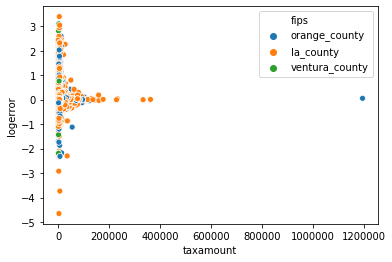

In [11]:
sns.scatterplot(data=train, x='taxamount', y='logerror', hue='fips')

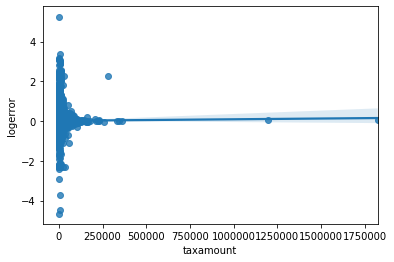

In [12]:
sns.regplot(x="taxamount", y="logerror", data=df)

In [13]:


t, p = stats.ttest_1samp(train.taxamount, train.logerror)
p
t

12097   NaN
23100   NaN
9346    NaN
34549   NaN
27477   NaN
         ..
30664   NaN
17875   NaN
73923   NaN
31017   NaN
42699   NaN
Name: logerror, Length: 43351, dtype: float64

In [14]:
t, p = stats.ttest_ind(train.taxamount, train.logerror)
p

nan

In [ ]:
observed = pd.crosstab(train.taxamount, train.logerror)

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

In [ ]:
train

- Does bedroom count have an effect on log error?

In [8]:
stats.levene(train.bedroomcnt, train.logerror)

LeveneResult(statistic=29717.080802085857, pvalue=0.0)

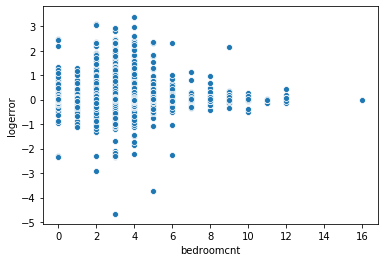

In [9]:
sns.scatterplot(data=train,x=train.bedroomcnt,y=train.logerror)